# **Import libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
import numpy as np

In [2]:
# Importing the packages
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import cv2
import matplotlib.pyplot as plt

print("Done")

Done


# **Requirements and Dependencies**
>  check if the requirements are installed
> 

In [3]:

requirements = [
    "tensorflow",
    "numpy",
    "matplotlib",
    "tensorboard",
    "tensorflow_hub",
    "sklearn",
]

# Check if each requirement is installed
missing_requirements = []
for requirement in requirements:
    try:
        __import__(requirement)
    except ImportError:
        missing_requirements.append(requirement)

# If any requirements are missing, print an error message
if missing_requirements:
    error_message = "One or more requirements are not installed.\n"
    error_message += "Please install the requirements in the requirements.txt file.\n"
    error_message += f"You can do this by running the following command in the terminal:\n"
    error_message += "pip install -r requirements.txt"
    raise ImportError(f"{error_message}\nMissing requirements: {', '.join(missing_requirements)}")

print("Done installing requirements!")

Done installing requirements!


# **Checking Available Devices for TensorFlow Execution**

In [4]:
# check devices available
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))
tf.config.list_physical_devices()


Num GPUs Available:  0


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# EDA process

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#ImageDataGenerator 
#using ImageDataGenerator, you can perform various data augmentation techniques like rotation, zooming, flipping, and more on-the-fly during training. 
#This helps in improving the model's ability to generalize and handle variations in the input data.

# **Using ImageDataGenerator for Image Data Augmentation**
> To apply data augmentation using ImageDataGenerator and obtain a batch of images and labels from a directory

In [6]:
imagedatagen = ImageDataGenerator()
train_ds = imagedatagen.flow_from_directory('/kaggle/input/jellyfish-types/Train_Test_Valid/Train')
print("classes: ", train_ds.class_indices)
imgs, labels = train_ds.next()

Found 900 images belonging to 6 classes.
classes:  {'Moon_jellyfish': 0, 'barrel_jellyfish': 1, 'blue_jellyfish': 2, 'compass_jellyfish': 3, 'lions_mane_jellyfish': 4, 'mauve_stinger_jellyfish': 5}


# **Displaying Random Images from the Dataset**


/opt/conda/lib/python3.10/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


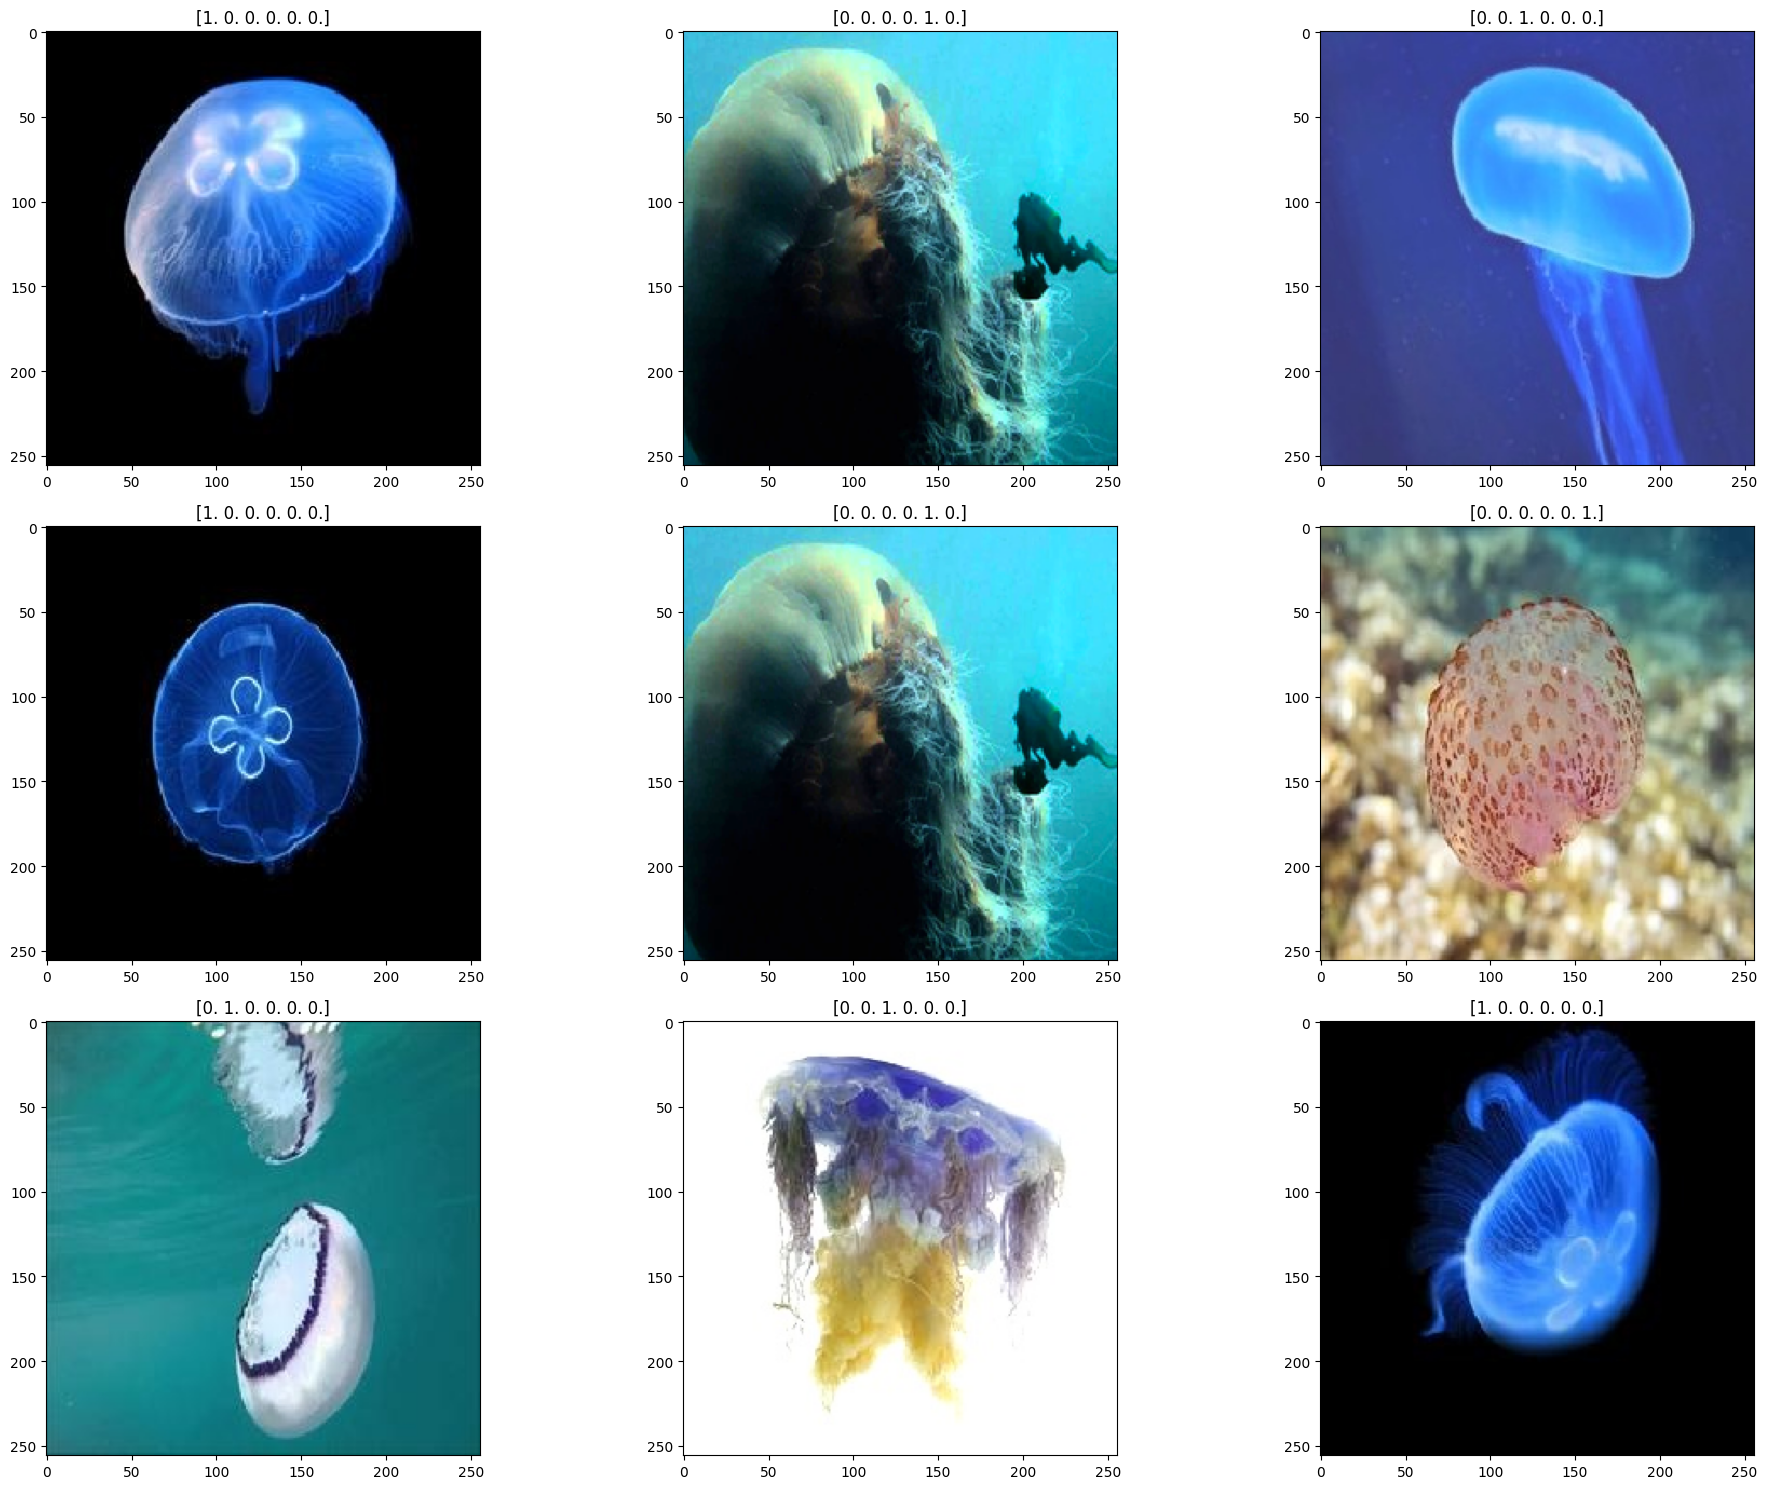

In [7]:
# Display random images from the dataset
fig, ax = plt.subplots(3, 3, figsize=(20, 15))

for i in range(3):
    for j in range(3):  # Add an additional loop for the second index
        idx = np.random.randint(0, len(imgs))
        ax[i, j].imshow(imgs[idx].astype("uint8"))
        ax[i, j].set_title(labels[idx])

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

# **Training a convolutional neural network (CNN)**
> Jellyfish Classification with CNN:
> Using TensorFlow and Keras, this code trains a CNN model to classify jellyfish types from images, incorporating data augmentation techniques for improved performance.

In [8]:
train_data_dir = '/kaggle/input/jellyfish-types/Train_Test_Valid/Train'
test_data_dir = '/kaggle/input/jellyfish-types/Train_Test_Valid/test'
valid_data_dir = '/kaggle/input/jellyfish-types/Train_Test_Valid/valid' 
img_width = 150
img_height = 150
batch_size = 32
num_classes = 6

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

optimizer = RMSprop(lr=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 250
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs,
    validation_data=valid_generator,
    validation_steps=validation_steps
)

train_loss, train_accuracy = model.evaluate(train_generator)
print("Train Accuracy:", train_accuracy)

# Calculate and print the accuracy for the validation set
validation_loss, validation_accuracy = model.evaluate(valid_generator)
print("Validation Accuracy:", validation_accuracy)

# Calculate and print the accuracy for the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

Found 900 images belonging to 6 classes.
Found 40 images belonging to 6 classes.
Found 39 images belonging to 6 classes.
Epoch 1/250
28/28 [==============================] - 28s 953ms/step - loss: 2.0450 - accuracy: 0.2051 - val_loss: 1.5954 - val_accuracy: 0.4375
Epoch 2/250
28/28 [==============================] - 26s 929ms/step - loss: 1.7027 - accuracy: 0.2684 - val_loss: 1.5520 - val_accuracy: 0.2812
Epoch 3/250
28/28 [==============================] - 26s 922ms/step - loss: 1.6804 - accuracy: 0.3422 - val_loss: 1.3464 - val_accuracy: 0.4375
Epoch 4/250
28/28 [==============================] - 26s 913ms/step - loss: 1.5466 - accuracy: 0.3779 - val_loss: 1.2577 - val_accuracy: 0.5312
Epoch 5/250
28/28 [==============================] - 25s 893ms/step - loss: 1.4924 - accuracy: 0.3802 - val_loss: 1.2079 - val_accuracy: 0.5938
Epoch 6/250
28/28 [==============================] - 26s 914ms/step - loss: 1.4066 - accuracy: 0.4194 - val_loss: 1.2931 - val_accuracy: 0.5000
Epoch 7/250
28/

# **Compute the Confusion Matrix**

2/2 [==============================] - 0s 49ms/step


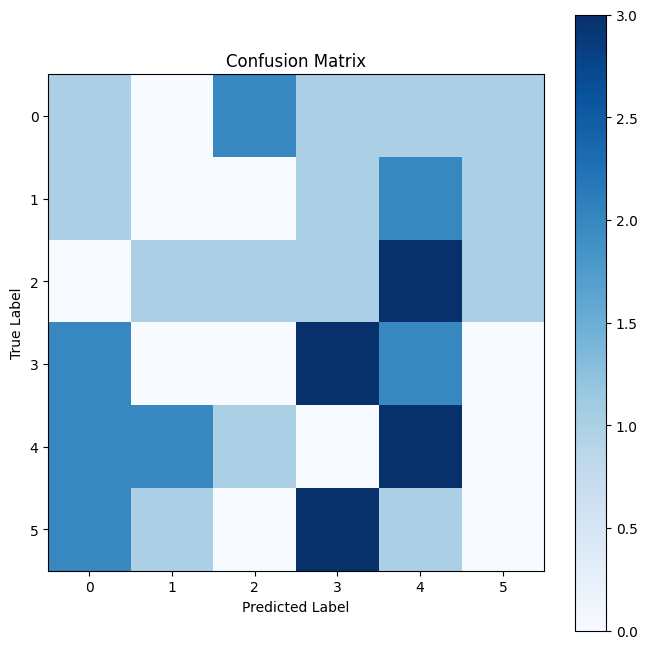

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the true labels for the test data
true_labels = test_generator.classes

# Generate predictions for the test data
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

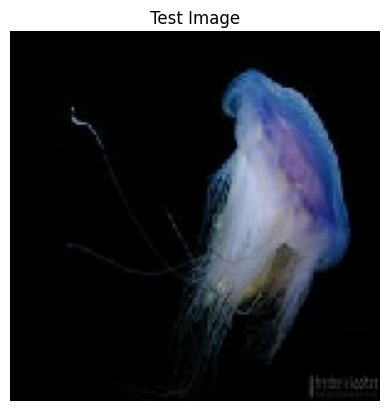

1/1 [==============================] - 0s 36ms/step


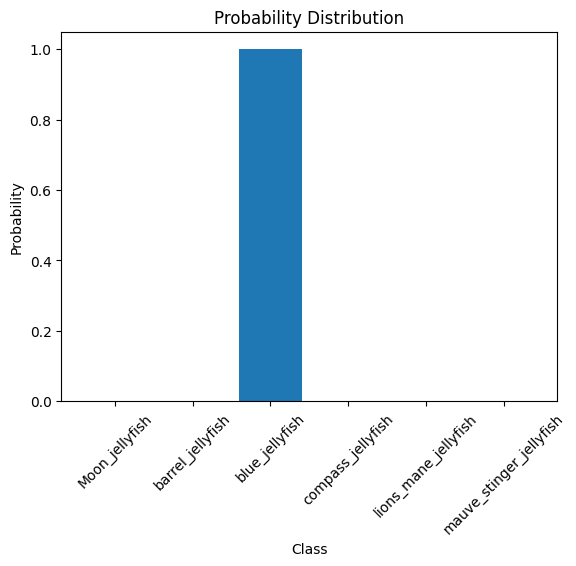

In [54]:
test_image_path = "/kaggle/input/jellyfish-types/blue_jellyfish/04.jpg"  
test_image = image.load_img(test_image_path, target_size=(img_width, img_height))

plt.imshow(test_image)
plt.axis('off')
plt.title("Test Image")
plt.show()

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalize the image

class_probabilities = model.predict(test_image)[0]
class_index = np.argmax(class_probabilities)
class_label = train_generator.class_indices
class_label = dict((v, k) for k, v in class_label.items())
predicted_class = class_label[class_index]

plt.bar(range(num_classes), class_probabilities)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.xticks(range(num_classes), class_label.values(), rotation=45)
plt.title("Probability Distribution")
plt.show()

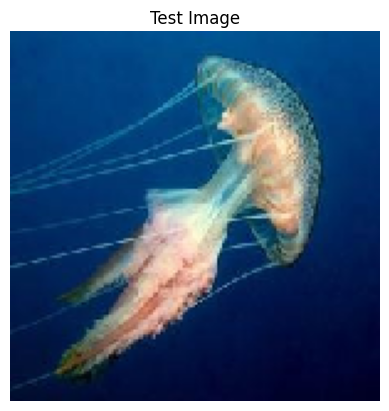

1/1 [==============================] - 0s 36ms/step


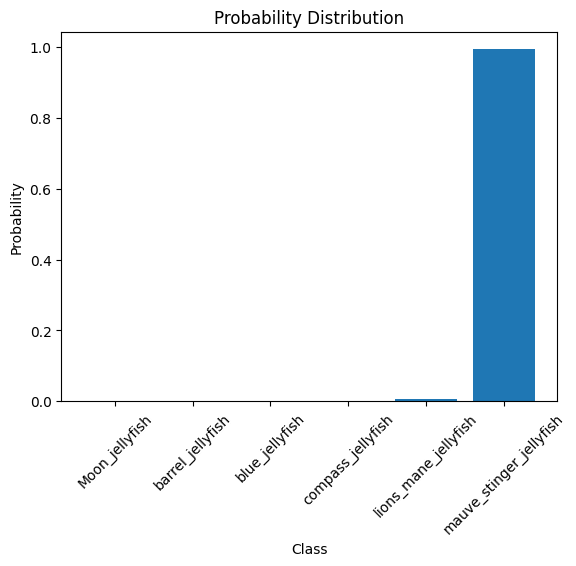

In [55]:
test_image_path = "/kaggle/input/jellyfish-types/mauve_stinger_jellyfish/01.jpg"  
test_image = image.load_img(test_image_path, target_size=(img_width, img_height))

plt.imshow(test_image)
plt.axis('off')
plt.title("Test Image")
plt.show()

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalize the image

class_probabilities = model.predict(test_image)[0]
class_index = np.argmax(class_probabilities)
class_label = train_generator.class_indices
class_label = dict((v, k) for k, v in class_label.items())
predicted_class = class_label[class_index]

plt.bar(range(num_classes), class_probabilities)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.xticks(range(num_classes), class_label.values(), rotation=45)
plt.title("Probability Distribution")
plt.show()

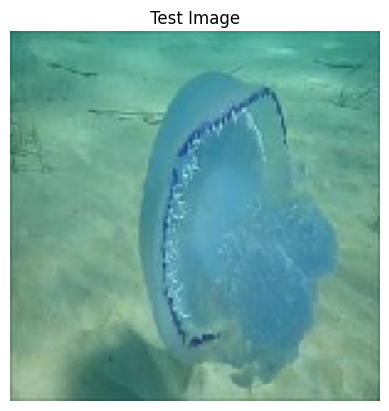

1/1 [==============================] - 0s 33ms/step


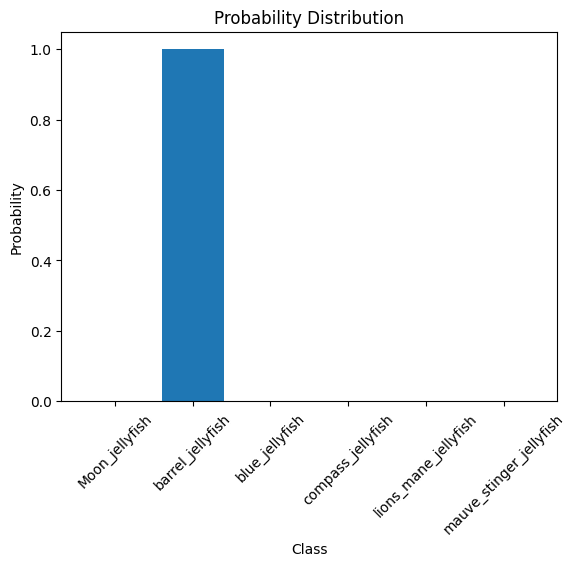

In [56]:
test_image_path = "/kaggle/input/jellyfish-types/barrel_jellyfish/07.jpg"  
test_image = image.load_img(test_image_path, target_size=(img_width, img_height))

plt.imshow(test_image)
plt.axis('off')
plt.title("Test Image")
plt.show()

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalize the image

class_probabilities = model.predict(test_image)[0]
class_index = np.argmax(class_probabilities)
class_label = train_generator.class_indices
class_label = dict((v, k) for k, v in class_label.items())
predicted_class = class_label[class_index]

plt.bar(range(num_classes), class_probabilities)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.xticks(range(num_classes), class_label.values(), rotation=45)
plt.title("Probability Distribution")
plt.show()

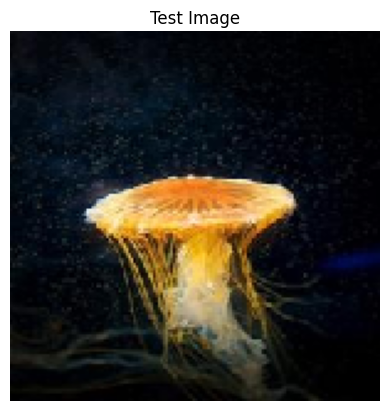

1/1 [==============================] - 0s 33ms/step


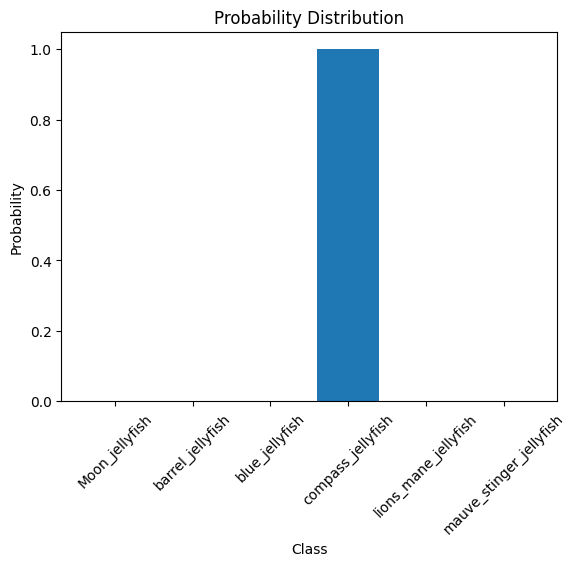

In [57]:
test_image_path = "/kaggle/input/jellyfish-types/compass_jellyfish/14.jpg"  
test_image = image.load_img(test_image_path, target_size=(img_width, img_height))

plt.imshow(test_image)
plt.axis('off')
plt.title("Test Image")
plt.show()

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalize the image

class_probabilities = model.predict(test_image)[0]
class_index = np.argmax(class_probabilities)
class_label = train_generator.class_indices
class_label = dict((v, k) for k, v in class_label.items())
predicted_class = class_label[class_index]

plt.bar(range(num_classes), class_probabilities)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.xticks(range(num_classes), class_label.values(), rotation=45)
plt.title("Probability Distribution")
plt.show()

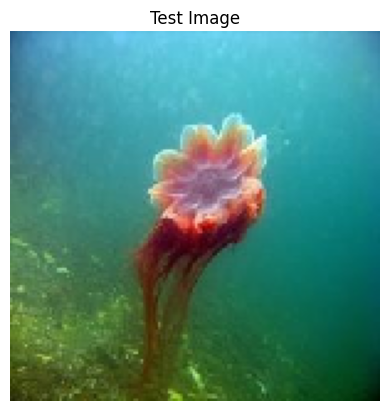

1/1 [==============================] - 0s 33ms/step


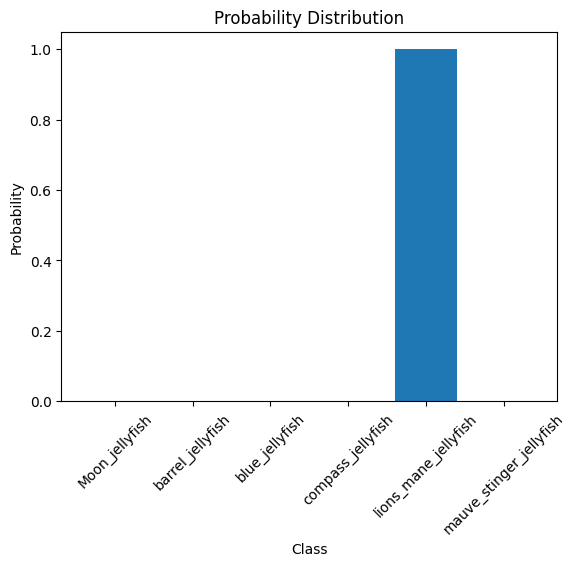

In [58]:
test_image_path = "/kaggle/input/jellyfish-types/lions_mane_jellyfish/23.jpg"  
test_image = image.load_img(test_image_path, target_size=(img_width, img_height))

plt.imshow(test_image)
plt.axis('off')
plt.title("Test Image")
plt.show()

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalize the image

class_probabilities = model.predict(test_image)[0]
class_index = np.argmax(class_probabilities)
class_label = train_generator.class_indices
class_label = dict((v, k) for k, v in class_label.items())
predicted_class = class_label[class_index]

plt.bar(range(num_classes), class_probabilities)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.xticks(range(num_classes), class_label.values(), rotation=45)
plt.title("Probability Distribution")
plt.show()

# **install the opencv-python package**

In [37]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


# **Perform Image Zooming and Shrinking**
1. Zooming:
* Zooming refers to increasing the size of an image. In the code, the cv2.resize() function is used to perform image zooming.
2. Shrinking:
* Shrinking refers to reducing the size of an image. In the code, the cv2.resize() function is used to perform image shrinking.


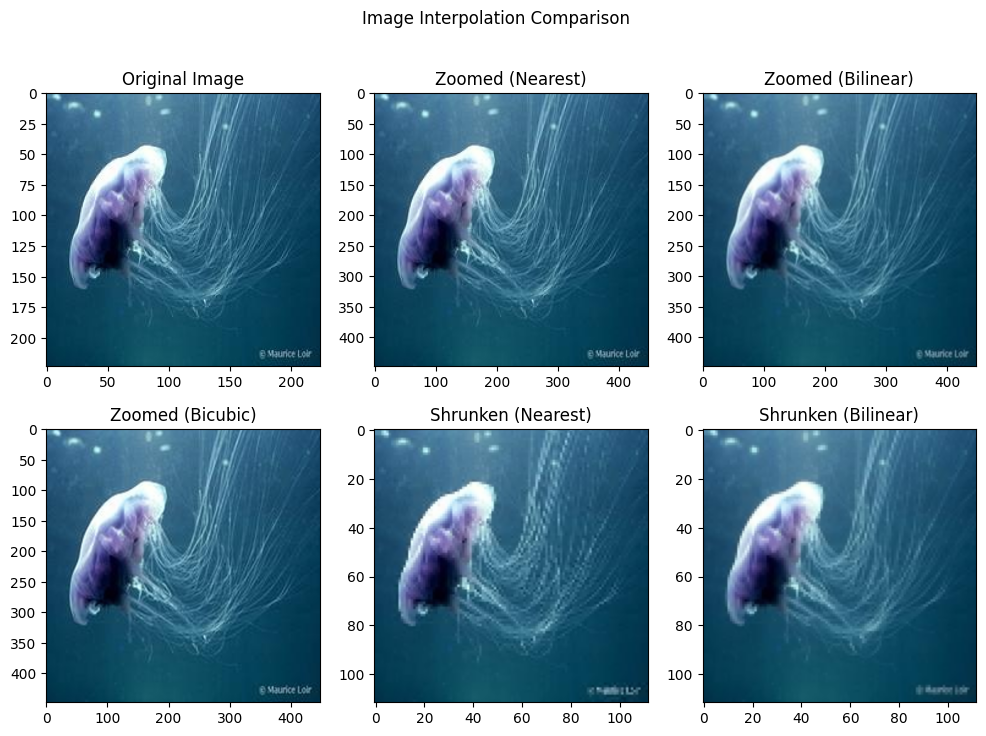

In [38]:
# Load the original image
originalImage = cv2.imread('/kaggle/input/jellyfish-types/blue_jellyfish/15.jpg')

# Define the scaling factors for zooming and shrinking
zoomFactor = 2  # Zooming by a factor of 2
shrinkFactor = 0.5  # Shrinking by a factor of 0.5

# Perform image zooming using different interpolation methods
zoomedNearest = cv2.resize(originalImage, None, fx=zoomFactor, fy=zoomFactor, interpolation=cv2.INTER_NEAREST)
zoomedBilinear = cv2.resize(originalImage, None, fx=zoomFactor, fy=zoomFactor, interpolation=cv2.INTER_LINEAR)
zoomedBicubic = cv2.resize(originalImage, None, fx=zoomFactor, fy=zoomFactor, interpolation=cv2.INTER_CUBIC)

# Perform image shrinking using different interpolation methods
shrunkenNearest = cv2.resize(originalImage, None, fx=shrinkFactor, fy=shrinkFactor, interpolation=cv2.INTER_NEAREST)
shrunkenBilinear = cv2.resize(originalImage, None, fx=shrinkFactor, fy=shrinkFactor, interpolation=cv2.INTER_LINEAR)
shrunkenBicubic = cv2.resize(originalImage, None, fx=shrinkFactor, fy=shrinkFactor, interpolation=cv2.INTER_CUBIC)

# Display the original and processed images
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(zoomedNearest, cv2.COLOR_BGR2RGB))
plt.title('Zoomed (Nearest)')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(zoomedBilinear, cv2.COLOR_BGR2RGB))
plt.title('Zoomed (Bilinear)')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(zoomedBicubic, cv2.COLOR_BGR2RGB))
plt.title('Zoomed (Bicubic)')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(shrunkenNearest, cv2.COLOR_BGR2RGB))
plt.title('Shrunken (Nearest)')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(shrunkenBilinear, cv2.COLOR_BGR2RGB))
plt.title('Shrunken (Bilinear)')

# Add titles and labels
plt.suptitle('Image Interpolation Comparison')
plt.show()

 


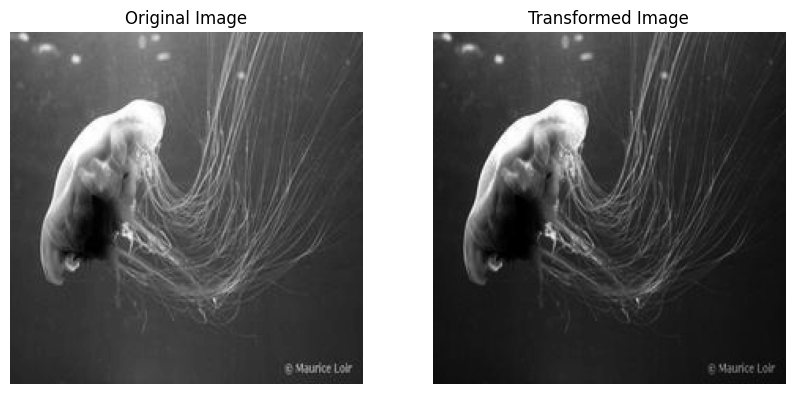

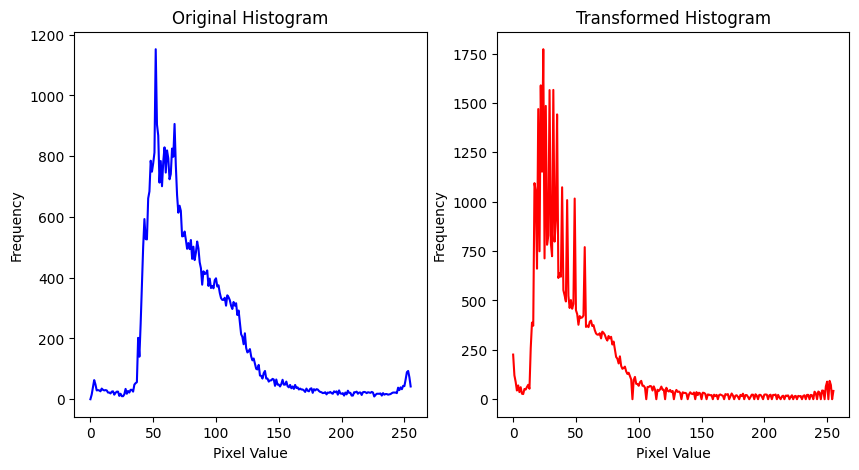

In [39]:
# Load an image
image = cv2.imread('/kaggle/input/jellyfish-types/blue_jellyfish/15.jpg', 0)  # Load the image in grayscale

# Define the gamma parameter
gamma = 1.5

# Apply the power-law transformation
transformed_image = np.power(image / 255.0, gamma) * 255.0
transformed_image = transformed_image.astype(np.uint8)

# Create histograms for the original and transformed images
original_hist = cv2.calcHist([image], [0], None, [256], [0, 256])
transformed_hist = cv2.calcHist([transformed_image], [0], None, [256], [0, 256])

# Display the original and transformed images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()

# Display the original and transformed histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(original_hist, color='blue')
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.plot(transformed_hist, color='red')
plt.title('Transformed Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()


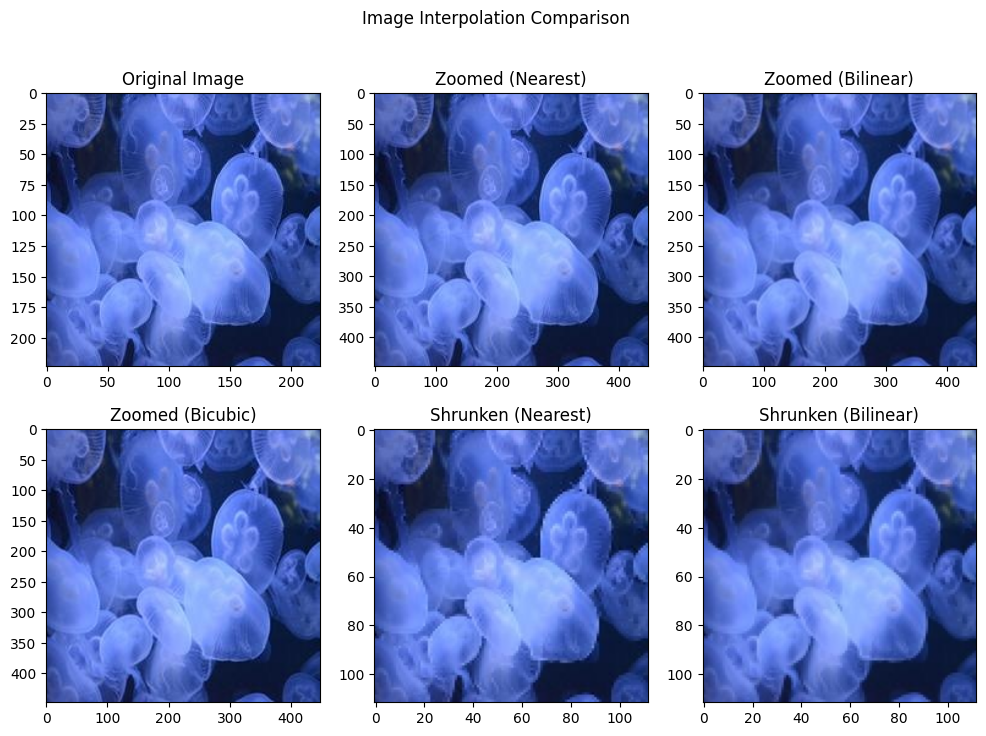

In [40]:
# Load the original image
originalImage = cv2.imread('/kaggle/input/jellyfish-types/blue_jellyfish/34.jpg')

# Define the scaling factors for zooming and shrinking
zoomFactor = 2  # Zooming by a factor of 2
shrinkFactor = 0.5  # Shrinking by a factor of 0.5

# Perform image zooming using different interpolation methods
zoomedNearest = cv2.resize(originalImage, None, fx=zoomFactor, fy=zoomFactor, interpolation=cv2.INTER_NEAREST)
zoomedBilinear = cv2.resize(originalImage, None, fx=zoomFactor, fy=zoomFactor, interpolation=cv2.INTER_LINEAR)
zoomedBicubic = cv2.resize(originalImage, None, fx=zoomFactor, fy=zoomFactor, interpolation=cv2.INTER_CUBIC)

# Perform image shrinking using different interpolation methods
shrunkenNearest = cv2.resize(originalImage, None, fx=shrinkFactor, fy=shrinkFactor, interpolation=cv2.INTER_NEAREST)
shrunkenBilinear = cv2.resize(originalImage, None, fx=shrinkFactor, fy=shrinkFactor, interpolation=cv2.INTER_LINEAR)
shrunkenBicubic = cv2.resize(originalImage, None, fx=shrinkFactor, fy=shrinkFactor, interpolation=cv2.INTER_CUBIC)

# Display the original and processed images
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(zoomedNearest, cv2.COLOR_BGR2RGB))
plt.title('Zoomed (Nearest)')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(zoomedBilinear, cv2.COLOR_BGR2RGB))
plt.title('Zoomed (Bilinear)')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(zoomedBicubic, cv2.COLOR_BGR2RGB))
plt.title('Zoomed (Bicubic)')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(shrunkenNearest, cv2.COLOR_BGR2RGB))
plt.title('Shrunken (Nearest)')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(shrunkenBilinear, cv2.COLOR_BGR2RGB))
plt.title('Shrunken (Bilinear)')

# Add titles and labels
plt.suptitle('Image Interpolation Comparison')
plt.show()
 


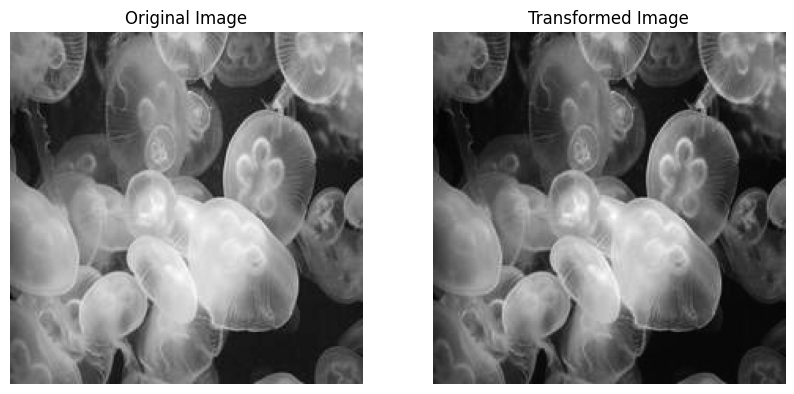

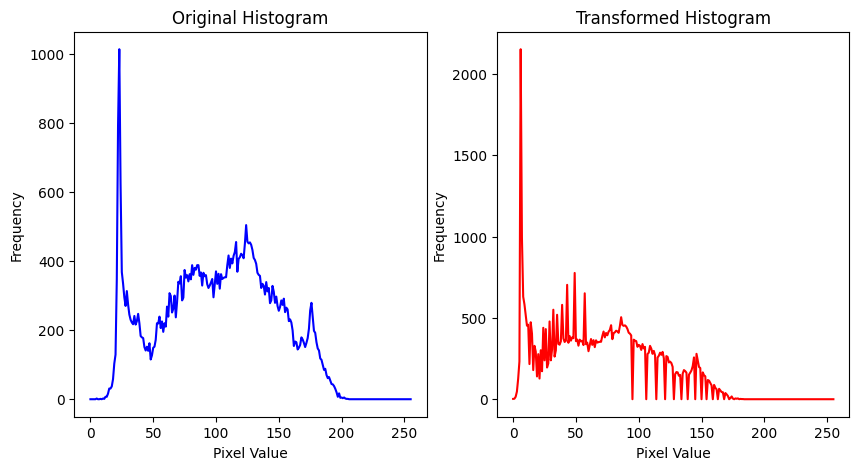

In [41]:
# Load an image
image = cv2.imread('/kaggle/input/jellyfish-types/blue_jellyfish/34.jpg', 0)  # Load the image in grayscale

# Define the gamma parameter
gamma = 1.5

# Apply the power-law transformation
transformed_image = np.power(image / 255.0, gamma) * 255.0
transformed_image = transformed_image.astype(np.uint8)

# Create histograms for the original and transformed images
original_hist = cv2.calcHist([image], [0], None, [256], [0, 256])
transformed_hist = cv2.calcHist([transformed_image], [0], None, [256], [0, 256])

# Display the original and transformed images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()

# Display the original and transformed histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(original_hist, color='blue')
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.plot(transformed_hist, color='red')
plt.title('Transformed Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()


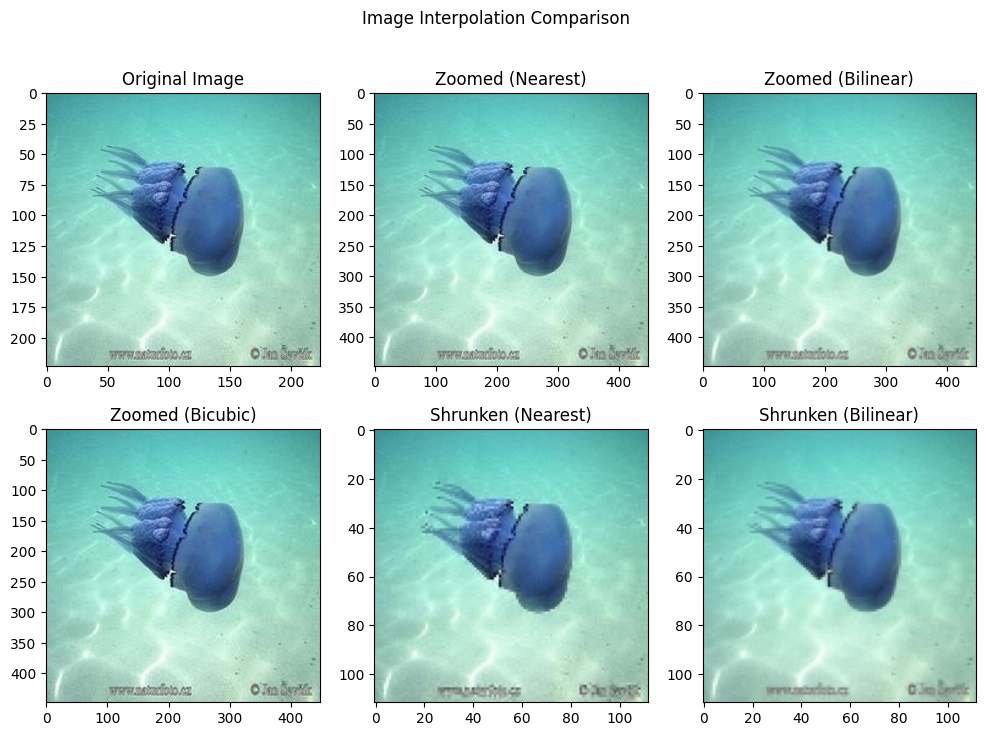

In [42]:
# Load the original image
originalImage = cv2.imread('/kaggle/input/jellyfish-types/barrel_jellyfish/11.jpg')

# Define the scaling factors for zooming and shrinking
zoomFactor = 2  # Zooming by a factor of 2
shrinkFactor = 0.5  # Shrinking by a factor of 0.5

# Perform image zooming using different interpolation methods
zoomedNearest = cv2.resize(originalImage, None, fx=zoomFactor, fy=zoomFactor, interpolation=cv2.INTER_NEAREST)
zoomedBilinear = cv2.resize(originalImage, None, fx=zoomFactor, fy=zoomFactor, interpolation=cv2.INTER_LINEAR)
zoomedBicubic = cv2.resize(originalImage, None, fx=zoomFactor, fy=zoomFactor, interpolation=cv2.INTER_CUBIC)

# Perform image shrinking using different interpolation methods
shrunkenNearest = cv2.resize(originalImage, None, fx=shrinkFactor, fy=shrinkFactor, interpolation=cv2.INTER_NEAREST)
shrunkenBilinear = cv2.resize(originalImage, None, fx=shrinkFactor, fy=shrinkFactor, interpolation=cv2.INTER_LINEAR)
shrunkenBicubic = cv2.resize(originalImage, None, fx=shrinkFactor, fy=shrinkFactor, interpolation=cv2.INTER_CUBIC)

# Display the original and processed images
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(zoomedNearest, cv2.COLOR_BGR2RGB))
plt.title('Zoomed (Nearest)')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(zoomedBilinear, cv2.COLOR_BGR2RGB))
plt.title('Zoomed (Bilinear)')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(zoomedBicubic, cv2.COLOR_BGR2RGB))
plt.title('Zoomed (Bicubic)')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(shrunkenNearest, cv2.COLOR_BGR2RGB))
plt.title('Shrunken (Nearest)')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(shrunkenBilinear, cv2.COLOR_BGR2RGB))
plt.title('Shrunken (Bilinear)')

# Add titles and labels
plt.suptitle('Image Interpolation Comparison')
plt.show()

 


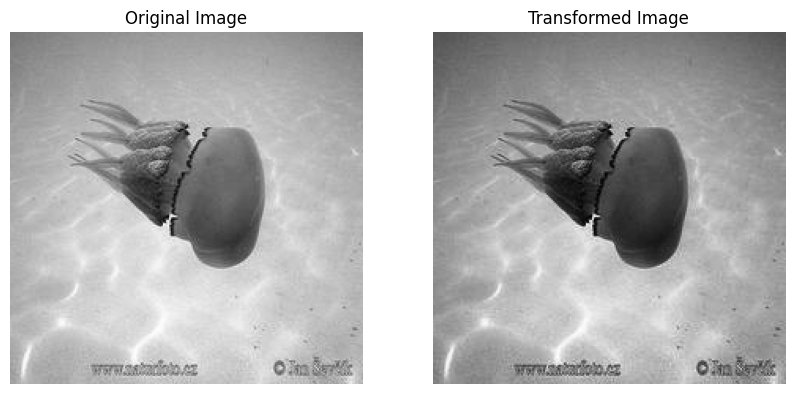

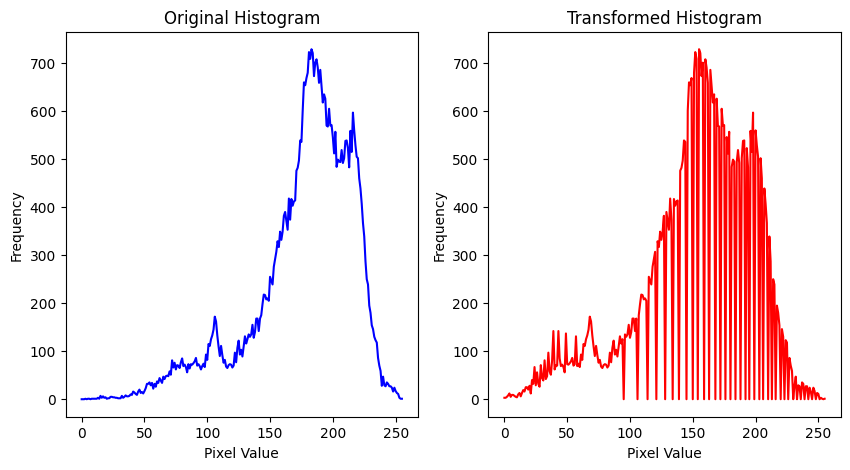

In [43]:
# Load an image
image = cv2.imread('/kaggle/input/jellyfish-types/barrel_jellyfish/11.jpg', 0)  # Load the image in grayscale

# Define the gamma parameter
gamma = 1.5

# Apply the power-law transformation
transformed_image = np.power(image / 255.0, gamma) * 255.0
transformed_image = transformed_image.astype(np.uint8)

# Create histograms for the original and transformed images
original_hist = cv2.calcHist([image], [0], None, [256], [0, 256])
transformed_hist = cv2.calcHist([transformed_image], [0], None, [256], [0, 256])

# Display the original and transformed images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()

# Display the original and transformed histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(original_hist, color='blue')
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.plot(transformed_hist, color='red')
plt.title('Transformed Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()


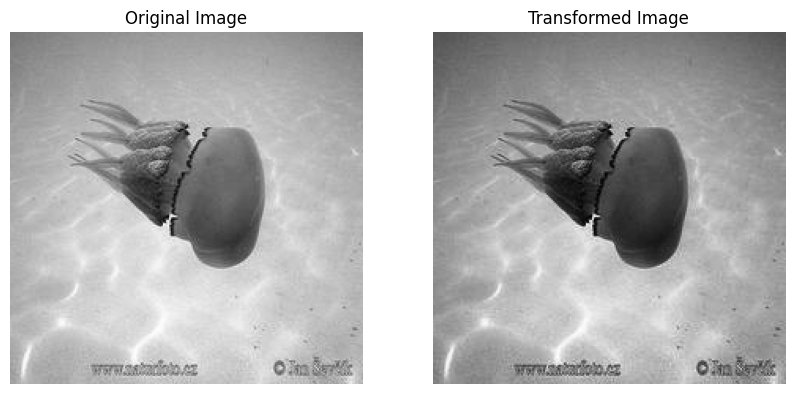

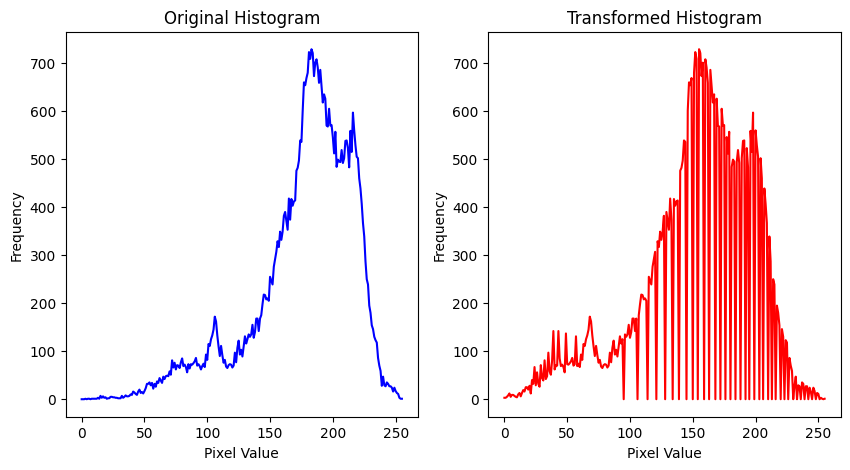

In [44]:
# Load an image
image = cv2.imread('/kaggle/input/jellyfish-types/barrel_jellyfish/11.jpg', 0)  # Load the image in grayscale

# Define the gamma parameter
gamma = 1.5

# Apply the power-law transformation
transformed_image = np.power(image / 255.0, gamma) * 255.0
transformed_image = transformed_image.astype(np.uint8)

# Create histograms for the original and transformed images
original_hist = cv2.calcHist([image], [0], None, [256], [0, 256])
transformed_hist = cv2.calcHist([transformed_image], [0], None, [256], [0, 256])

# Display the original and transformed images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()

# Display the original and transformed histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(original_hist, color='blue')
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.plot(transformed_hist, color='red')
plt.title('Transformed Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()
